<small><i>This notebook was created by [Sergey Tomin](http://www.xfel.eu/organization/staff/tomin_sergey/) for Workshop: [Designing future X-ray FELs](http://www.xrayfels.co.uk/). Source and license info is on [GitHub](https://github.com/iagapov/ocelot/tree/dev/docs). August 2016. </i></small>

## Tutorial N4. Space Charge.
tracking of the 200k particles. 2nd order + Space Change effect. Till the end of ACC39.

This example will cover the following topics:
* Initialization of the Space Charge objects and the places of their applying
* tracking of second order with space charge effect.

#### Requirements 
* injector_lattice.py - input file, the Injector lattice.
* beam_distrib.ast    - input file, initial beam distribution in [ASTRA](http://www.desy.de/~mpyflo/) format.

## Import of modules

In [1]:
# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline

# this python library provides generic shallow (copy) and deep copy (deepcopy) operations 
from copy import deepcopy

# import from Ocelot main modules and functions
from ocelot import *

# import from Ocelot graphical modules
from ocelot.gui.accelerator import *

# import injector lattice
from injector_lattice import *

# load beam distribution
# this function convert Astra beam distribution to Ocelot format - ParticleArray. ParticleArray is designed for tracking.
# in order to work with converters we have to import specific module from ocelot.adaptors
from ocelot.adaptors.astra2ocelot import *

initializing ocelot...


In [2]:
p_array_init = astraBeam2particleArray(filename='beam_distrib.ast')

Astra to Ocelot: charge =  2.5e-10
Astra to Ocelot: particles number =  200000
Astra to Ocelot: energy =  0.00655793899822
Astra to Ocelot: s pos =  3.2


In [3]:
# initialization of tracking method
method = MethodTM()

# for second order tracking we have to choose SecondTM 
method.global_method = SecondTM

# for first order tracking uncomment next line
# method.global_method = TransferMap

# we will start simulation from point 3.2 from the gun. For this purpose  marker was created (start_sim=Marker()) 
# and placed in 3.2 m after gun 
# C3_AH1_1_8_I1 is the last section of the 3.9 GHz cavity
lat = MagneticLattice(cell, start=start_sim, stop=C3_AH1_1_8_I1, method=method)

In [4]:
sc = SpaceCharge()
sc.nmesh_xyz = [31, 31, 31]
sc.step = 1

In [5]:
navi = Navigator(lat)

# add physics processes from the first element to the last of the lattice
navi.add_physics_proc(sc, lat.sequence[0], lat.sequence[-1])

# definiing unit step in [m]
navi.unit_step = 0.1 

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
tws_track, p_array = track(lat, p_array, navi)

z = 17.3514 / 17.35140000000001 : applied: 

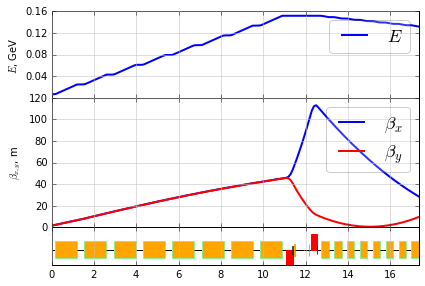

In [6]:
# you can change top_plot argument, for example top_plot=["alpha_x", "alpha_y"]
plot_opt_func(lat, tws_track, top_plot=["E"], fig_name=0, legend=False)